<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Pandas</p><br>

*pandas* is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. 

*pandas* build upon *numpy* and *scipy* providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures *pandas* provides are *Series* and *DataFrames*. After a brief introduction to these two data structures and data ingestion, the key features of *pandas* this notebook covers are:
* Generating descriptive statistics on data
* Data cleaning using built in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Working with timestamps and time-series data

**Additional Recommended Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas



<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Import Libraries
</p>

In [1]:
import pandas as pd

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Introduction to pandas Data Structures</p>
<br>
*pandas* has two main data structures it uses, namely, *Series* and *DataFrames*. 

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas Series</p>

*pandas Series* one-dimensional labeled array. 


In [2]:
ser = pd.Series([100, 'foo', 300, 'bar', 500], ['tom', 'bob', 'nancy', 'dan', 'eric'])

In [3]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [4]:
ser.index

Index(['tom', 'bob', 'nancy', 'dan', 'eric'], dtype='object')

In [5]:
ser.loc[['nancy','bob']]

nancy    300
bob      foo
dtype: object

In [6]:
ser[[4, 3, 1]]

eric    500
dan     bar
bob     foo
dtype: object

In [7]:
ser.iloc[2] #iloc is short of index location

300

In [8]:
'bob' in ser

True

In [9]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [10]:
ser * 2

tom         200
bob      foofoo
nancy       600
dan      barbar
eric       1000
dtype: object

In [11]:
ser[['nancy', 'eric']] ** 2

nancy     90000
eric     250000
dtype: object

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas DataFrame</p>

*pandas DataFrame* is a 2-dimensional labeled data structure.

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from dictionary of Python Series</p>

In [12]:
d = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}

In [13]:
df = pd.DataFrame(d)
print(df)

          one     two
apple   100.0   111.0
ball    200.0   222.0
cerill    NaN   333.0
clock   300.0     NaN
dancy     NaN  4444.0


In [14]:
df.index

Index(['apple', 'ball', 'cerill', 'clock', 'dancy'], dtype='object')

In [15]:
df.columns

Index(['one', 'two'], dtype='object')

In [16]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'])

one     two
dancy    NaN  4444.0
ball   200.0   222.0
apple  100.0   111.0

In [17]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'], columns=['two', 'five'])

two five
dancy  4444.0  NaN
ball    222.0  NaN
apple   111.0  NaN

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from list of Python dictionaries</p>

In [18]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]

In [19]:
pd.DataFrame(data)

alex  alice  dora  ema  joe
0   1.0    NaN   NaN  NaN  2.0
1   NaN   20.0  10.0  5.0  NaN

In [20]:
pd.DataFrame(data, index=['orange', 'red'])

alex  alice  dora  ema  joe
orange   1.0    NaN   NaN  NaN  2.0
red      NaN   20.0  10.0  5.0  NaN

In [21]:
pd.DataFrame(data, columns=['joe', 'dora','alice'])

joe  dora  alice
0  2.0   NaN    NaN
1  NaN  10.0   20.0

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Basic DataFrame operations</p>

In [22]:
df

one     two
apple   100.0   111.0
ball    200.0   222.0
cerill    NaN   333.0
clock   300.0     NaN
dancy     NaN  4444.0

In [23]:
df['one']

apple     100.0
ball      200.0
cerill      NaN
clock     300.0
dancy       NaN
Name: one, dtype: float64

In [24]:
df['three'] = df['one'] * df['two']
df 

one     two    three
apple   100.0   111.0  11100.0
ball    200.0   222.0  44400.0
cerill    NaN   333.0      NaN
clock   300.0     NaN      NaN
dancy     NaN  4444.0      NaN

In [25]:
df['flag'] = df['one'] > 250
df

one     two    three   flag
apple   100.0   111.0  11100.0  False
ball    200.0   222.0  44400.0  False
cerill    NaN   333.0      NaN  False
clock   300.0     NaN      NaN   True
dancy     NaN  4444.0      NaN  False

In [26]:
three = df.pop('three')

In [27]:
three

apple     11100.0
ball      44400.0
cerill        NaN
clock         NaN
dancy         NaN
Name: three, dtype: float64

In [28]:
df

one     two   flag
apple   100.0   111.0  False
ball    200.0   222.0  False
cerill    NaN   333.0  False
clock   300.0     NaN   True
dancy     NaN  4444.0  False

In [29]:
del df['two']

In [30]:
df

one   flag
apple   100.0  False
ball    200.0  False
cerill    NaN  False
clock   300.0   True
dancy     NaN  False

In [31]:
df.insert(2, 'copy_of_one', df['one'])
df

one   flag  copy_of_one
apple   100.0  False        100.0
ball    200.0  False        200.0
cerill    NaN  False          NaN
clock   300.0   True        300.0
dancy     NaN  False          NaN

In [32]:
df['one_upper_half'] = df['one'][:2]
df

one   flag  copy_of_one  one_upper_half
apple   100.0  False        100.0           100.0
ball    200.0  False        200.0           200.0
cerill    NaN  False          NaN             NaN
clock   300.0   True        300.0             NaN
dancy     NaN  False          NaN             NaN

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movie Data Analysis</p>
<br>This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. 

## Download the Dataset

Please note that **you will need to download the dataset**. Although the video for this notebook says that the data is in your folder, the folder turned out to be too large to fit on the edX platform due to size constraints.

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

Once the download completes, please make sure the data files are in a directory called *movielens* in your *Week-3-pandas* folder. 

Let us look at the files in this dataset using the UNIX command ls.


In [33]:
# Note: Adjust the name of the folder to match your local directory

!ls ./movielens

movies.csv  ratings.csv  tags.csv


In [34]:
!cat ./movielens/movies.csv | wc -l

4999


In [35]:
!head -5 ./movielens/ratings.csv

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<br>
</p>
<br>
In this notebook, we will be using three CSV files:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* <br>

Using the *read_csv* function in pandas, we will ingest these three files.

In [36]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
print(type(movies))
movies.head(15)

<class 'pandas.core.frame.DataFrame'>


movieId                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   
5         6                         Heat (1995)   
6         7                      Sabrina (1995)   
7         8                 Tom and Huck (1995)   
8         9                 Sudden Death (1995)   
9        10                    GoldenEye (1995)   
10       11      American President, The (1995)   
11       12  Dracula: Dead and Loving It (1995)   
12       13                        Balto (1995)   
13       14                        Nixon (1995)   
14       15             Cutthroat Island (1995)   

                                         genres  
0   Adventure|Animation|Children|Comedy|Fantasy  
1                    Adventure|Children|Fantasy  
2                                Comedy|Romance  
3                          Comedy|Drama|Romance  
4                                        Comedy  
5                         Action|Crime|Thriller  
6                                Comedy|Romance  
7                            Adventure|Children  
8                                        Action  
9                     Action|Adventure|Thriller  
10                         Comedy|Drama|Romance  
11                                Comedy|Horror  
12                 Adventure|Animation|Children  
13                                        Drama  
14                     Action|Adventure|Romance

In [37]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

tags = pd.read_csv('./movielens/tags.csv', sep=',')
tags.head()

userId  movieId            tag   timestamp
0      18     4141    Mark Waters  1240597180
1      65      208      dark hero  1368150078
2      65      353      dark hero  1368150079
3      65      521  noir thriller  1368149983
4      65      592      dark hero  1368150078

In [38]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580

In [39]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp']
del tags['timestamp']

<h1 style="font-size:2em;color:#2467C0">Data Structures </h1>

<h1 style="font-size:1.5em;color:#2467C0">Series</h1>

In [40]:
#Extract 0th row: notice that it is infact a Series

row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [41]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [42]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [43]:
row_0['userId']

18

In [44]:
'rating' in row_0

False

In [45]:
row_0.name

0

In [46]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

<h1 style="font-size:1.5em;color:#2467C0">DataFrames </h1>

In [47]:
tags.head()

userId  movieId            tag
0      18     4141    Mark Waters
1      65      208      dark hero
2      65      353      dark hero
3      65      521  noir thriller
4      65      592      dark hero

In [48]:
tags.index

RangeIndex(start=0, stop=4999, step=1)

In [49]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [50]:
# Extract row 0, 11, 2000 from DataFrame

tags.iloc[ [0,11,2000] ]

userId  movieId                tag
0         18     4141        Mark Waters
11        65     1783      noir thriller
2000     910    68554  conspiracy theory

<h1 style="font-size:2em;color:#2467C0">Descriptive Statistics</h1>

Let's look how the ratings are distributed! 

In [51]:
ratings['rating'].describe()

count    4999.000000
mean        3.647329
std         1.048613
min         0.500000
25%         3.000000
50%         4.000000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

In [52]:
ratings.describe()

userId        movieId       rating
count  4999.000000    4999.000000  4999.000000
mean     22.344669    6780.667133     3.647329
std      13.172093   15760.962347     1.048613
min       1.000000       1.000000     0.500000
25%      11.000000     505.000000     3.000000
50%      23.000000    1597.000000     4.000000
75%      31.000000    3863.000000     4.500000
max      50.000000  125916.000000     5.000000

In [53]:
ratings['rating'].mean()

3.6473294658931787

In [54]:
ratings.mean()

userId       22.344669
movieId    6780.667133
rating        3.647329
dtype: float64

In [55]:
ratings['rating'].min()

0.5

In [56]:
ratings['rating'].max()

5.0

In [57]:
ratings['rating'].std()

1.0486125142090725

In [58]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [59]:
ratings.corr()

userId   movieId    rating
userId   1.000000  0.012123 -0.066298
movieId  0.012123  1.000000  0.024118
rating  -0.066298  0.024118  1.000000

In [60]:
filter_1 = ratings['rating'] > 5
print(filter_1)
filter_1.any()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
4969    False
4970    False
4971    False
4972    False
4973    False
4974    False
4975    False
4976    False
4977    False
4978    False
4979    False
4980    False
4981    False
4982    False
4983    False
4984    False
4985    False
4986    False
4987    False
4988    False
4989    False
4990    False
4991    False
4992    False
4993    False
4994    False
4995    False
4996    False
4997    False
4998    False
Name: rating, Length: 4999, dtype: bool


False

In [61]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>

In [62]:
movies.shape

(4999, 3)

In [63]:
#is any row NULL ?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

Thats nice ! No NULL values !

In [64]:
ratings.shape

(4999, 3)

In [65]:
#is any row NULL ?

ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

Thats nice ! No NULL values !

In [66]:
tags.shape

(4999, 3)

In [67]:
#is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

We have some tags which are NULL.

In [68]:
tags = tags.dropna()

In [69]:
#Check again: is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [70]:
tags.shape

(4999, 3)

Thats nice ! No NULL values ! Notice the number of lines have reduced.

<h1 style="font-size:2em;color:#2467C0">Data Visualization</h1>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d900ae400>]],
      dtype=object)

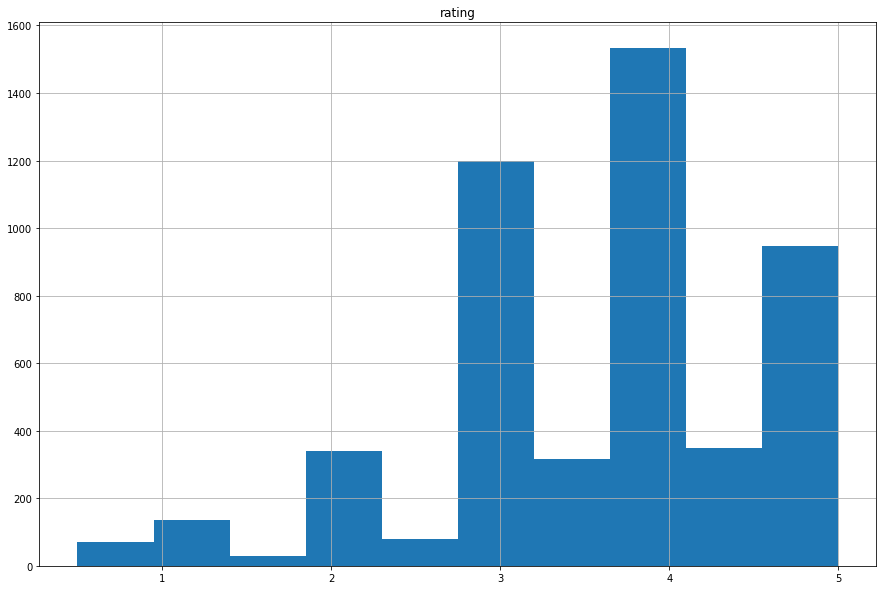

In [71]:
%matplotlib inline

ratings.hist(column='rating', figsize=(15,10))

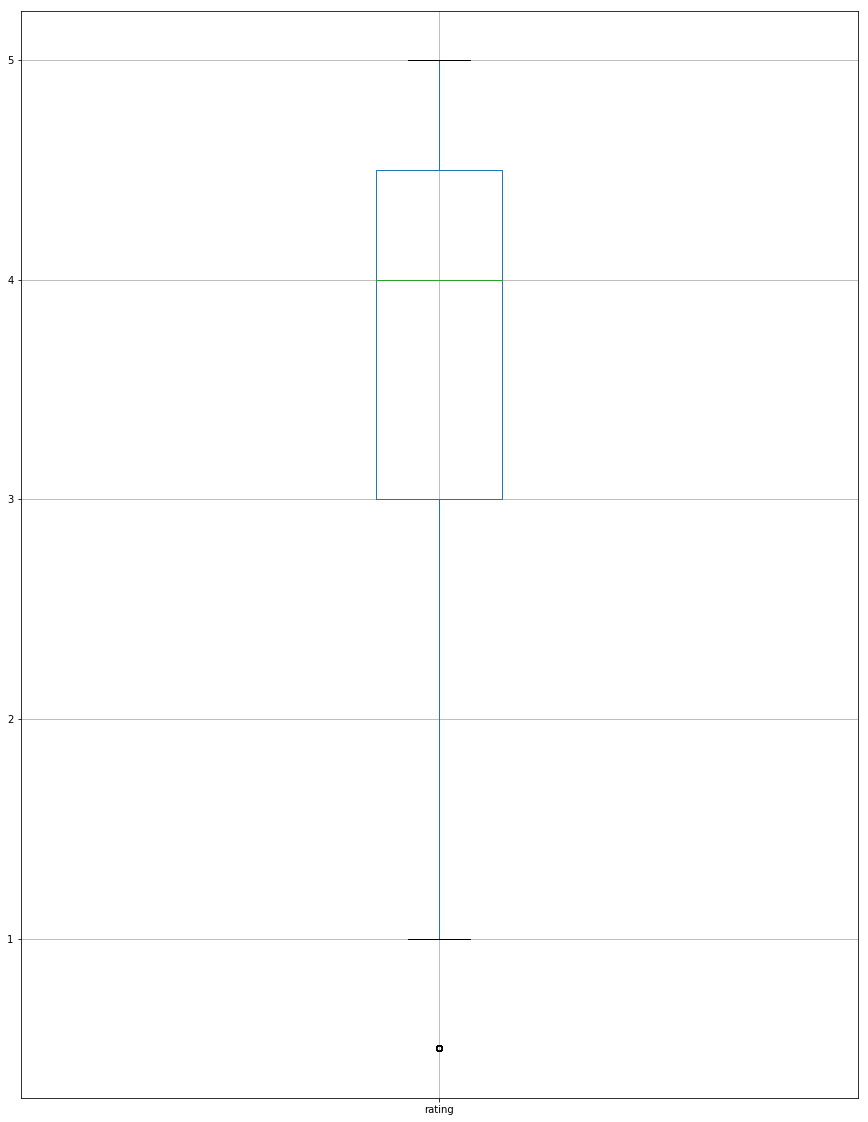

In [72]:
ratings.boxplot(column='rating', figsize=(15,20))

<h1 style="font-size:2em;color:#2467C0">Slicing Out Columns</h1>
 

In [73]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [74]:
movies[['title','genres']].head()

title  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [75]:
ratings[-10:]

userId  movieId  rating
4989      50      551     4.0
4990      50      589     4.5
4991      50      590     3.5
4992      50      593     4.0
4993      50      597     3.5
4994      50      608     4.0
4995      50      910     3.5
4996      50      912     5.0
4997      50      923     3.5
4998      50      924     5.0

In [76]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

Humphrey Bogart        1
gender disguise        1
18th century           1
xenophobic?            1
Ryan Reynolds          1
Kate Winslet           1
setting:golf course    1
co-dependancy          1
weak dialoges          1
experimental           1
Name: tag, dtype: int64

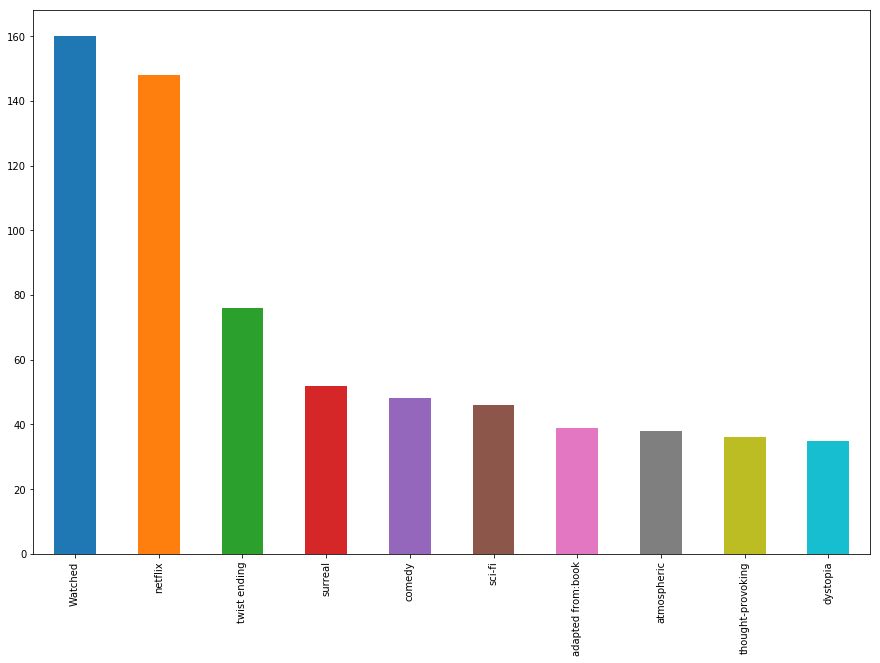

In [77]:
tag_counts[:10].plot(kind='bar', figsize=(15,10))

<h1 style="font-size:2em;color:#2467C0">Filters for Selecting Rows</h1>

In [78]:
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][30:50]

userId  movieId  rating
68        1     2021     4.0
69        1     2100     4.0
70        1     2118     4.0
71        1     2138     4.0
72        1     2140     4.0
73        1     2143     4.0
74        1     2173     4.0
75        1     2174     4.0
76        1     2193     4.0
79        1     2288     4.0
80        1     2291     4.0
81        1     2542     4.0
82        1     2628     4.0
90        1     2762     4.0
92        1     2872     4.0
94        1     2944     4.0
96        1     2959     4.0
97        1     2968     4.0
101       1     3081     4.0
102       1     3153     4.0

In [79]:
is_animation = movies['genres'].str.contains('Animation')

movies[is_animation][5:15]

movieId                                       title  \
310      313                   Swan Princess, The (1994)   
360      364                       Lion King, The (1994)   
388      392  Secret Adventures of Tom Thumb, The (1993)   
547      551      Nightmare Before Christmas, The (1993)   
553      558                      Pagemaster, The (1994)   
582      588                              Aladdin (1992)   
588      594      Snow White and the Seven Dwarfs (1937)   
589      595                 Beauty and the Beast (1991)   
590      596                            Pinocchio (1940)   
604      610                          Heavy Metal (1981)   

                                              genres  
310                               Animation|Children  
360  Adventure|Animation|Children|Drama|Musical|IMAX  
388                              Adventure|Animation  
547               Animation|Children|Fantasy|Musical  
553      Action|Adventure|Animation|Children|Fantasy  
582      Adventure|Animation|Children|Comedy|Musical  
588         Animation|Children|Drama|Fantasy|Musical  
589  Animation|Children|Fantasy|Musical|Romance|IMAX  
590               Animation|Children|Fantasy|Musical  
604         Action|Adventure|Animation|Horror|Sci-Fi

In [80]:
movies[is_animation].head(15)

movieId                                       title  \
0          1                            Toy Story (1995)   
12        13                                Balto (1995)   
47        48                           Pocahontas (1995)   
236      239                       Goofy Movie, A (1995)   
241      244                     Gumby: The Movie (1995)   
310      313                   Swan Princess, The (1994)   
360      364                       Lion King, The (1994)   
388      392  Secret Adventures of Tom Thumb, The (1993)   
547      551      Nightmare Before Christmas, The (1993)   
553      558                      Pagemaster, The (1994)   
582      588                              Aladdin (1992)   
588      594      Snow White and the Seven Dwarfs (1937)   
589      595                 Beauty and the Beast (1991)   
590      596                            Pinocchio (1940)   
604      610                          Heavy Metal (1981)   

                                              genres  
0        Adventure|Animation|Children|Comedy|Fantasy  
12                      Adventure|Animation|Children  
47          Animation|Children|Drama|Musical|Romance  
236                Animation|Children|Comedy|Romance  
241                               Animation|Children  
310                               Animation|Children  
360  Adventure|Animation|Children|Drama|Musical|IMAX  
388                              Adventure|Animation  
547               Animation|Children|Fantasy|Musical  
553      Action|Adventure|Animation|Children|Fantasy  
582      Adventure|Animation|Children|Comedy|Musical  
588         Animation|Children|Drama|Fantasy|Musical  
589  Animation|Children|Fantasy|Musical|Romance|IMAX  
590               Animation|Children|Fantasy|Musical  
604         Action|Adventure|Animation|Horror|Sci-Fi

<h1 style="font-size:2em;color:#2467C0">Group By and Aggregate </h1>

In [81]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

movieId
rating         
0.5          71
1.0         135
1.5          29
2.0         340
2.5          80
3.0        1199
3.5         317
4.0        1533
4.5         349
5.0         946

In [82]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

rating
movieId          
1        3.941176
2        3.100000
3        3.571429
4        2.000000
5        2.375000

In [83]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

rating
movieId        
1            17
2             5
3             7
4             1
5             4

In [84]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

rating
movieId        
106489        1
106696        1
112852        1
118696        1
125916        1

<h1 style="font-size:2em;color:#2467C0">Merge Dataframes</h1>

In [85]:
tags.head()

userId  movieId            tag
0      18     4141    Mark Waters
1      65      208      dark hero
2      65      353      dark hero
3      65      521  noir thriller
4      65      592      dark hero

In [86]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [87]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId                                     tag  
0    1644                                 Watched  
1    1741                      computer animation  
2    1741                 Disney animated feature  
3    1741                         Pixar animation  
4    1741  TÃ©a Leoni does not star in this movie

More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>


Combine aggreagation, merging, and filters to get useful analytics
</p>

In [88]:
# We chose as_index to be false so that new indices for the rows thus # merged are generated. Had as_index been true then movieId would have 
# been used as the index for the data thus merged.
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

movieId    rating
0        1  3.941176
1        2  3.100000
2        3  3.571429
3        4  2.000000
4        5  2.375000

In [89]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

movieId                             title  \
1469     5040        Conan the Destroyer (1984)   
1470     5046                   Impostor (2002)   
1471     5060      M*A*S*H (a.k.a. MASH) (1970)   
1472     5064  The Count of Monte Cristo (2002)   
1473     5066        Walk to Remember, A (2002)   

                                       genres  rating  
1469                 Action|Adventure|Fantasy     3.0  
1470             Action|Drama|Sci-Fi|Thriller     4.5  
1471                         Comedy|Drama|War     5.0  
1472  Action|Adventure|Drama|Romance|Thriller     4.0  
1473                            Drama|Romance     4.0

In [90]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

movieId                             title  \
1468     5039               Dragonslayer (1981)   
1470     5046                   Impostor (2002)   
1471     5060      M*A*S*H (a.k.a. MASH) (1970)   
1472     5064  The Count of Monte Cristo (2002)   
1473     5066        Walk to Remember, A (2002)   

                                       genres  rating  
1468                 Action|Adventure|Fantasy     4.0  
1470             Action|Drama|Sci-Fi|Thriller     4.5  
1471                         Comedy|Drama|War     5.0  
1472  Action|Adventure|Drama|Romance|Thriller     4.0  
1473                            Drama|Romance     4.0

In [91]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

movieId                               title  \
0        1                    Toy Story (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
6        7                      Sabrina (1995)   

                                        genres    rating  
0  Adventure|Animation|Children|Comedy|Fantasy  3.941176  
2                               Comedy|Romance  3.571429  
3                         Comedy|Drama|Romance  2.000000  
4                                       Comedy  2.375000  
6                               Comedy|Romance  3.812500

In [92]:
box_office[is_comedy & is_highly_rated][-5:]

movieId                             title  \
1456     4974     Not Another Teen Movie (2001)   
1457     4979      Royal Tenenbaums, The (2001)   
1459     4990  Jimmy Neutron: Boy Genius (2001)   
1461     4994              Majestic, The (2001)   
1471     5060      M*A*S*H (a.k.a. MASH) (1970)   

                                   genres  rating  
1456                               Comedy    4.50  
1457                         Comedy|Drama    4.75  
1459  Adventure|Animation|Children|Comedy    4.50  
1461                 Comedy|Drama|Romance    4.00  
1471                     Comedy|Drama|War    5.00

<h1 style="font-size:2em;color:#2467C0">Vectorized String Operations</h1>


In [93]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Split 'genres' into multiple columns

<br> </p>

In [94]:
movie_genres = movies['genres'].str.split('|', expand=True)
# generally split just provides a series of list, however using expand # as true we make sure that the output of the split is not just a list # instead a data frame in itself.

In [95]:
movie_genres[:10]

0          1         2       3        4     5     6     7
0  Adventure  Animation  Children  Comedy  Fantasy  None  None  None
1  Adventure   Children   Fantasy    None     None  None  None  None
2     Comedy    Romance      None    None     None  None  None  None
3     Comedy      Drama   Romance    None     None  None  None  None
4     Comedy       None      None    None     None  None  None  None
5     Action      Crime  Thriller    None     None  None  None  None
6     Comedy    Romance      None    None     None  None  None  None
7  Adventure   Children      None    None     None  None  None  None
8     Action       None      None    None     None  None  None  None
9     Action  Adventure  Thriller    None     None  None  None  None

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Add a new column for comedy genre flag

<br> </p>

In [96]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [97]:
movie_genres[:10]

0          1         2       3        4     5     6     7  isComedy
0  Adventure  Animation  Children  Comedy  Fantasy  None  None  None      True
1  Adventure   Children   Fantasy    None     None  None  None  None     False
2     Comedy    Romance      None    None     None  None  None  None      True
3     Comedy      Drama   Romance    None     None  None  None  None      True
4     Comedy       None      None    None     None  None  None  None      True
5     Action      Crime  Thriller    None     None  None  None  None     False
6     Comedy    Romance      None    None     None  None  None  None      True
7  Adventure   Children      None    None     None  None  None  None     False
8     Action       None      None    None     None  None  None  None     False
9     Action  Adventure  Thriller    None     None  None  None  None     False

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Extract year from title e.g. (1995)

<br> </p>

In [98]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [99]:
movies.tail()

movieId                                              title  \
4994     5090  Hunchback of Notre Dame, The (Notre Dame de Pa...   
4995     5091                       The Man from Acapulco (1973)   
4996     5092                                Big Fat Liar (2002)   
4997     5093                           Collateral Damage (2002)   
4998     5094                                  Rollerball (2002)   

                             genres  year  
4994                          Drama  1956  
4995  Action|Comedy|Fantasy|Romance  1973  
4996                Children|Comedy  2002  
4997                Action|Thriller  2002  
4998                  Action|Sci-Fi  2002

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

More here: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods
<br> </p>

<h1 style="font-size:2em;color:#2467C0">Parsing Timestamps</h1>

Timestamps are common in sensor data or other time series datasets.
Let us revisit the *tags.csv* dataset and read the timestamps!


In [100]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')

In [101]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970
</p>

In [102]:
tags.head(5)

userId  movieId            tag   timestamp
0      18     4141    Mark Waters  1240597180
1      65      208      dark hero  1368150078
2      65      353      dark hero  1368150079
3      65      521  noir thriller  1368149983
4      65      592      dark hero  1368150078

In [103]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Data Type datetime64[ns] maps to either <M8[ns] or >M8[ns] depending on the hardware

</p>

In [104]:

tags['parsed_time'].dtype

dtype('<M8[ns]')

In [105]:
tags.head(2)

userId  movieId          tag   timestamp         parsed_time
0      18     4141  Mark Waters  1240597180 2009-04-24 18:19:40
1      65      208    dark hero  1368150078 2013-05-10 01:41:18

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Selecting rows based on timestamps
</p>

In [106]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

((4999, 5), (121, 5))

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Sorting the table using the timestamps
</p>

In [107]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

userId  movieId                                 tag   timestamp  \
1145     469     4262                           overrated  1136768939   
2443    1523      292                               Gross  1137374901   
2444    1523     2054                           Bit Corny  1137374968   
2445    1523     2054                 Good Oldskool Movie  1137374968   
269      208    41573  utterly predictable ensemble flick  1137445827   
1989     910    34536                        World War II  1137552613   
2352    1387     2316                           Favorites  1137764988   
2343    1387     1230                           Favorites  1137765052   
2345    1387     1292                           Favorites  1137765071   
2350    1387     2109                           Favorites  1137765083   

             parsed_time  
1145 2006-01-09 01:08:59  
2443 2006-01-16 01:28:21  
2444 2006-01-16 01:29:28  
2445 2006-01-16 01:29:28  
269  2006-01-16 21:10:27  
1989 2006-01-18 02:50:13  
2352 2006-01-20 13:49:48  
2343 2006-01-20 13:50:52  
2345 2006-01-20 13:51:11  
2350 2006-01-20 13:51:23

<h1 style="font-size:2em;color:#2467C0">Average Movie Ratings over Time </h1>
## Are Movie ratings related to the year of launch?

In [108]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

movieId  rating
2085   106489     5.0
2086   106696     3.0
2087   112852     4.5
2088   118696     5.0
2089   125916     0.5

In [109]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()

movieId   rating
movieId  1.00000 -0.05903
rating  -0.05903  1.00000

In [110]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

year    rating
0  1921  2.000000
1  1922  3.500000
2  1927  3.500000
3  1931  3.666667
4  1932  3.000000
5  1933  4.000000
6  1934  3.500000
7  1935  4.000000
8  1936  3.000000
9  1937  3.714286

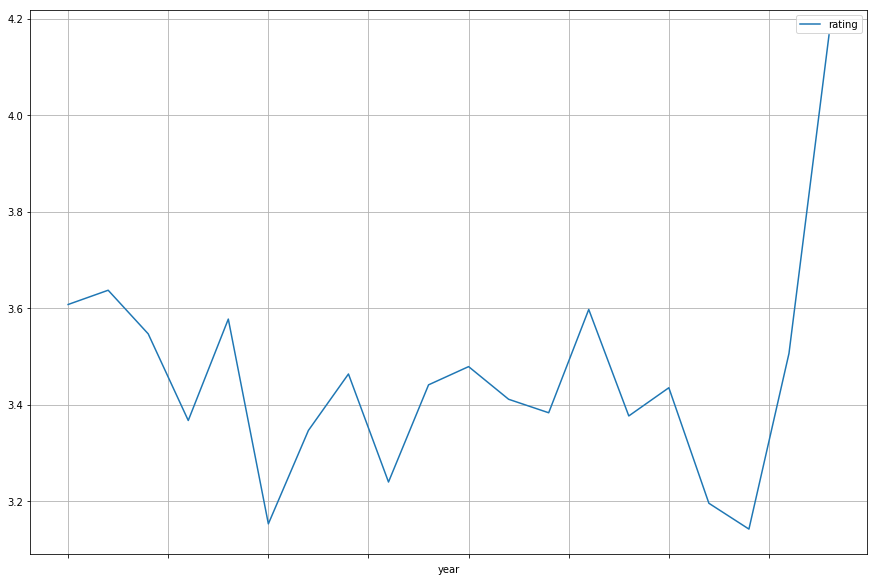

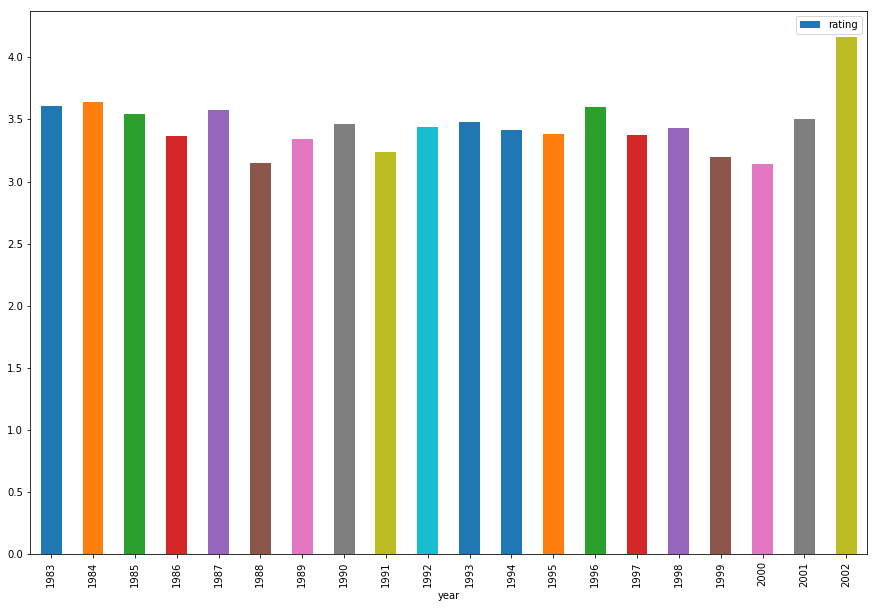

In [111]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)
yearly_average[-20:].plot(kind='bar', x= 'year', y='rating', figsize=(15,10))